In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM,Dropout,Dense
import matplotlib.pyplot as plt

import datetime

In [4]:
data = pd.read_csv('005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-11,37520.0,38560.0,37420.0,38280.0,33369.289063,12018150
1,2017-01-12,38000.0,38800.0,37980.0,38800.0,33822.582031,11669150
2,2017-01-13,38100.0,38320.0,37460.0,37460.0,32654.472656,15954450
3,2017-01-16,36860.0,37820.0,36320.0,36660.0,31957.105469,16611500
4,2017-01-17,36580.0,37460.0,36580.0,36960.0,32218.613281,8150700


중간값

In [5]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices)/2

create window

In [6]:
seq_len = 50
sequence_length = seq_len + 1

result = []

for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index+sequence_length])

정규화

In [8]:
normalized_data = []
for window in result:
    normalized_window =[((float(p)/float(window[0]))-1)for p in window]
    normalized_data.append(normalized_window)
    
result = np.array(normalized_data)

row = int(round(result.shape[0] * 0.9))
train = result[:row,:]
np.random.shuffle(train)

xtrain = train[:,:-1]
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
ytrain = train[:,-1]

xtest = result[row:, :-1]
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
ytest = result[row:, -1]

xtrain.shape, xtest.shape

((1058, 50, 1), (117, 50, 1))

Model

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(xtrain, ytrain,
         validation_data=(xtest,ytest),
         batch_size=10,
         epochs=20)

Epoch 1/20
106/106 [==============================] - 4s 34ms/step - loss: 2.9528e-04 - val_loss: 1.1765e-04
Epoch 2/20
106/106 [==============================] - 4s 38ms/step - loss: 2.8530e-04 - val_loss: 1.3612e-04
Epoch 3/20
106/106 [==============================] - 4s 36ms/step - loss: 3.0731e-04 - val_loss: 1.5719e-04
Epoch 4/20
106/106 [==============================] - 4s 33ms/step - loss: 2.9787e-04 - val_loss: 2.0820e-04
Epoch 5/20
106/106 [==============================] - 4s 34ms/step - loss: 2.8973e-04 - val_loss: 1.1561e-04
Epoch 6/20
106/106 [==============================] - 4s 35ms/step - loss: 2.8465e-04 - val_loss: 1.7794e-04
Epoch 7/20
106/106 [==============================] - 4s 35ms/step - loss: 2.8236e-04 - val_loss: 1.2520e-04
Epoch 8/20
106/106 [==============================] - 4s 34ms/step - loss: 2.9192e-04 - val_loss: 1.0987e-04
Epoch 9/20
106/106 [==============================] - 4s 34ms/step - loss: 2.7273e-04 - val_loss: 1.3643e-04
Epoch 10/20
106/106

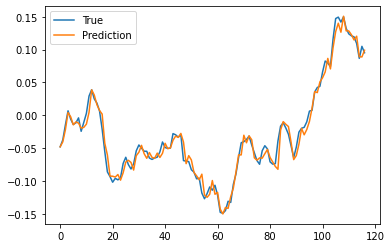

In [14]:
pred = model.predict(xtest)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(ytest, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()